In [1]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import seaborn as sea

import matplotlib.image as mpimage

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#Sizes of each class (Original)
cataract_num = len(os.listdir('dataset/cataract'))
diabetic_num = len(os.listdir('dataset/diabetic_retinopathy'))
glaucoma_num = len(os.listdir('dataset/glaucoma'))
normal_num = len(os.listdir('dataset/normal'))

print("Cataract: ", cataract_num)
print("Diabetic retinopathy: ", diabetic_num)
print("Glaucoma: ", glaucoma_num)
print("Normal: ", normal_num)

Cataract:  1031
Diabetic retinopathy:  1098
Glaucoma:  1007
Normal:  1074


In [3]:
#Get random image
import random
directory = 'dataset/cataract'
image_files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
cataract_image_path = os.path.join(directory, random_image)

directory = 'dataset/diabetic_retinopathy'
image_files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
diabetic_image_path = os.path.join(directory, random_image)

directory = 'dataset/glaucoma'
image_files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
glaucoma_image_path = os.path.join(directory, random_image)

directory_normal = 'dataset/normal'
image_files = [file for file in os.listdir(directory_normal) if file.endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
normal_image_path = os.path.join(directory_normal, random_image)



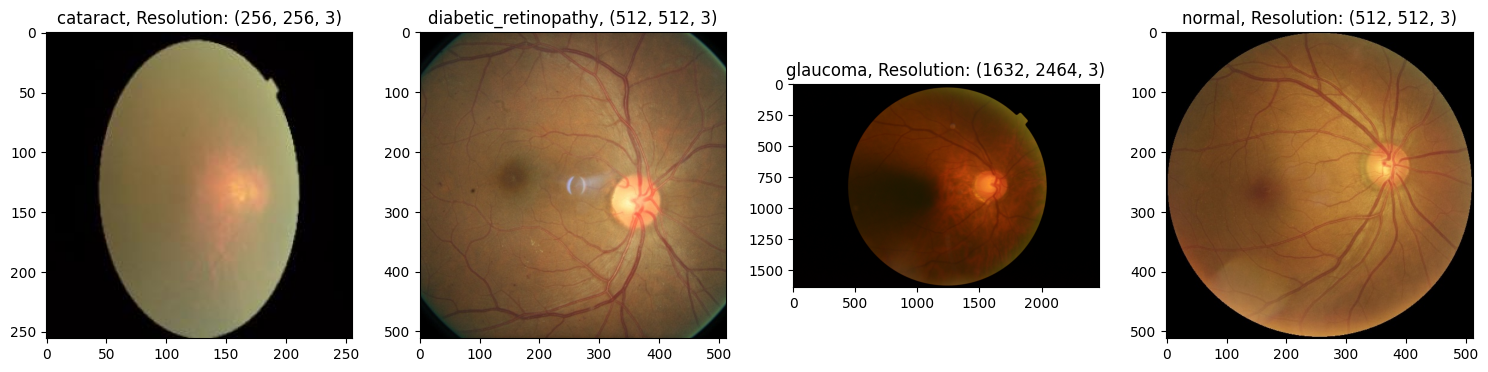

In [4]:
fig, ax = plt.subplots(1,4, figsize=(15,8))
# Cataract Image
cataract_img = mpimage.imread(cataract_image_path)
ax[0].imshow(cataract_img)
ax[0].set_title(f'cataract, Resolution: {cataract_img.shape}')

# Diabetic_retinopathy
diabetic_retinopathy_img = mpimage.imread(diabetic_image_path)
ax[1].imshow(diabetic_retinopathy_img)
ax[1].set_title(f'diabetic_retinopathy, {diabetic_retinopathy_img.shape}')

# Glaucoma Image
glaucoma_img = mpimage.imread(glaucoma_image_path)
ax[2].imshow(glaucoma_img)
ax[2].set_title(f'glaucoma, Resolution: {glaucoma_img.shape}')

# Normal Image
normal_img = mpimage.imread(normal_image_path)
ax[3].imshow(normal_img)
ax[3].set_title(f'normal, Resolution: {normal_img.shape}')

plt.tight_layout()
plt.show()

Get 300 from each class except the Normal class and put in a new directory

In [5]:
import os
import random
import shutil

# Define the original directory path
original_directory = 'dataset'

# Define the new directory path
new_directory = 'dataset_f'

# Define the number of images to select from each class
num_images_per_class = 300

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

        # Define the class names
    class_names = ['glaucoma', 'diabetic_retinopathy', 'cataract', 'normal']

    # Copy random images from the original directory to the new directory
    for class_name in class_names:
        class_directory = os.path.join(original_directory, class_name)
        images = os.listdir(class_directory)

        if class_name == 'normal':
            selected_images = images
        else:
            selected_images = random.sample(images, min(num_images_per_class, len(images)))

        for image_name in selected_images:
            source_path = os.path.join(class_directory, image_name)
            destination_path = os.path.join(new_directory, class_name, image_name)

            if not os.path.exists(destination_path):
                # Create the class folder inside the new directory if it doesn't exist
                if not os.path.exists(os.path.join(new_directory, class_name)):
                    os.makedirs(os.path.join(new_directory, class_name))

                # Copy the image to the new directory
                shutil.copy(source_path, destination_path)
            else:
                print("File already exists:", destination_path)

    print("Subset of images created in the new directory:", new_directory)

else: 
    print(new_directory, "already exists")

dataset_f already exists


In [6]:
#Sizes of each class
cataract_num = len(os.listdir('dataset_f/cataract'))
diabetic_num = len(os.listdir('dataset_f/diabetic_retinopathy'))
glaucoma_num = len(os.listdir('dataset_f/glaucoma'))
normal_num = len(os.listdir('dataset_f/normal'))

print("Cataract: ", cataract_num)
print("Diabetic retinopathy: ", diabetic_num)
print("Glaucoma: ", glaucoma_num)
print("Normal: ", normal_num)

Cataract:  300
Diabetic retinopathy:  300
Glaucoma:  300
Normal:  1074


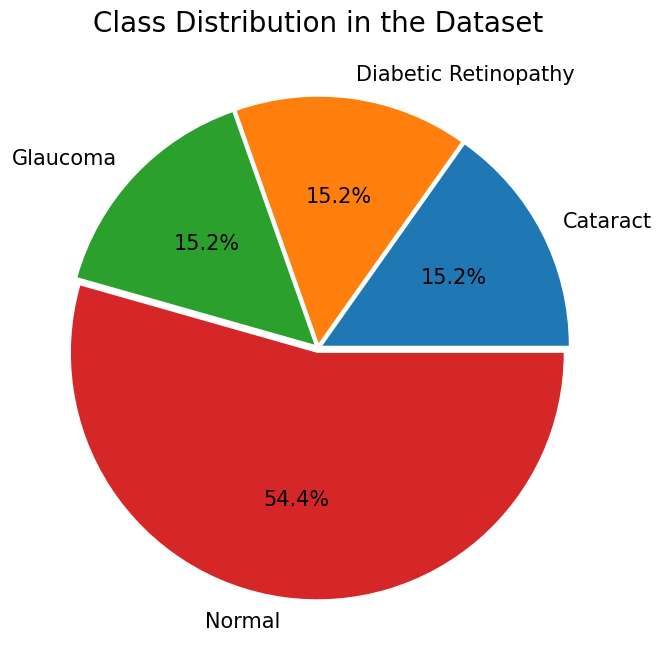

In [7]:
# Data for the pie chart
labels = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']
sizes = [cataract_num, diabetic_num, glaucoma_num, normal_num]
explode = [0.02, 0.02, 0.02, 0.02]

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={"fontsize": 15})

# Add a title
plt.title('Class Distribution in the Dataset', fontsize=20)

# Display the chart
plt.show()

Split the dataset

In [8]:
import splitfolders

if not os.path.exists('final_ds'):
    splitfolders.ratio('dataset_f', output="final_ds", seed=369, ratio=(.7, 0.2,0.1)) 
else:
    print('final_ds already exists')


final_ds already exists


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

# directory paths
train_directory = 'final_ds/train'
val_directory = 'final_ds/val'
test_directory = 'final_ds/test'


# Define the batch size and image size
batch_size = 64 
image_size = (224, 224) #default
IMG_SIZE = 224

# Create the train dataset
train = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    shuffle=True,
    batch_size=batch_size,
    image_size=image_size,
    seed=42
)

#Create the validation dataset
val = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    shuffle=True,
    batch_size=batch_size,
    image_size=image_size,
    seed=42
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    shuffle=True,
    batch_size=batch_size,
    image_size=image_size,
    seed=42
)


# Print class names
class_names = train.class_names
print("Class names:", class_names)



Found 1381 files belonging to 4 classes.
Found 394 files belonging to 4 classes.
Found 199 files belonging to 4 classes.
Class names: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [10]:
# getting class names 
for idx, name in enumerate(class_names):
  print(f"{idx} = {name}", end=", ")

0 = cataract, 1 = diabetic_retinopathy, 2 = glaucoma, 3 = normal, 

In [11]:
labels = np.concatenate([y for x,y in train], axis=0)
values = pd.value_counts(labels)
train_values = values.sort_index()
print("Train Set")
train_values

Train Set


0    210
1    210
2    210
3    751
Name: count, dtype: int64

In [12]:
labels = np.concatenate([y for x,y in val], axis=0)
values = pd.value_counts(labels)
values = values.sort_index()
print("Validation Set")
values

Validation Set


0     60
1     60
2     60
3    214
Name: count, dtype: int64

In [13]:
labels = np.concatenate([y for x,y in test], axis=0)
values = pd.value_counts(labels)
values = values.sort_index()
print("Test Set")
values

Test Set


0     30
1     30
2     30
3    109
Name: count, dtype: int64

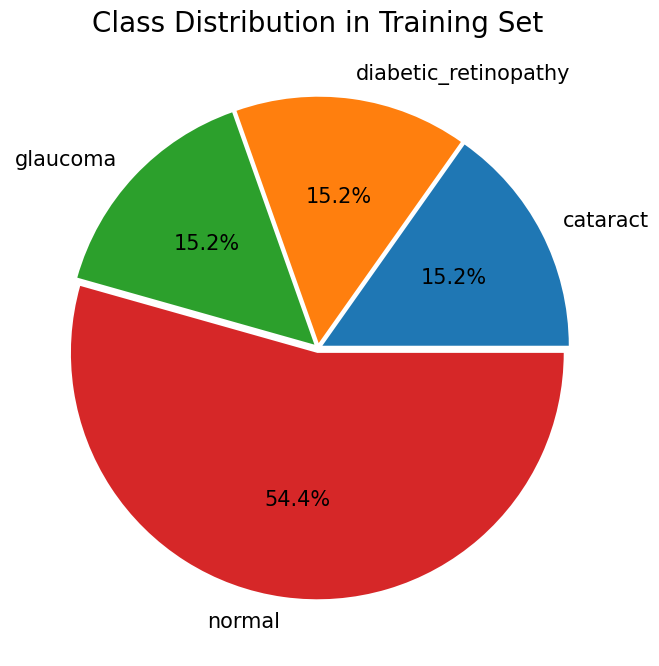

In [14]:
#To show that the dataset is imbalanced
plt.figure(figsize=(12,8))
plt.pie(train_values,labels=class_names,autopct='%1.1f%%', explode = [0.02,0.02,0.02, 0.02], textprops = {"fontsize":15})
plt.title('Class Distribution in Training Set', fontsize=20)
plt.show()

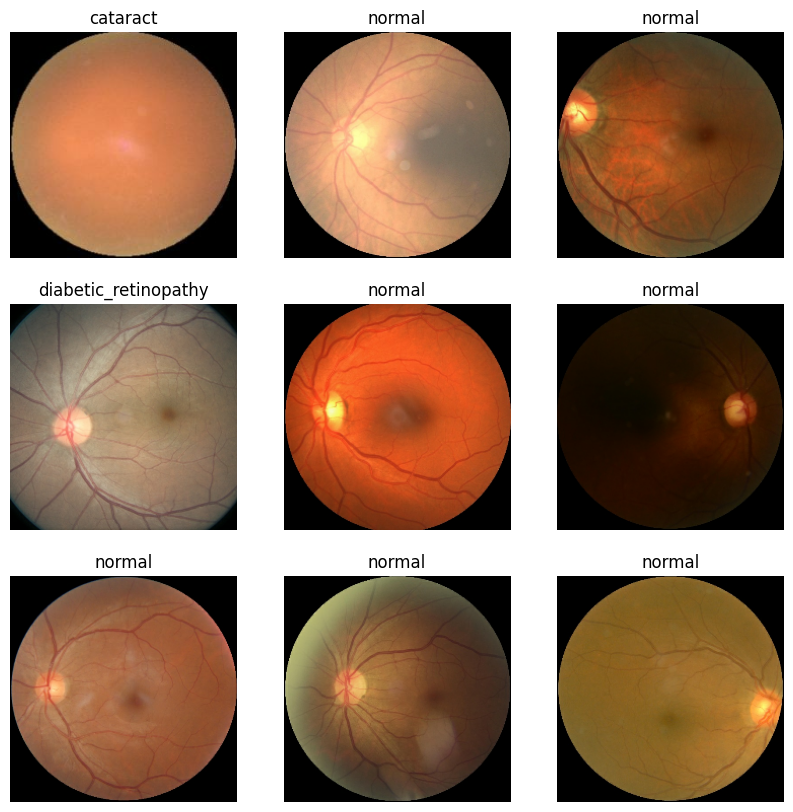

In [15]:
#Show the first nine images and labels from the train set:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

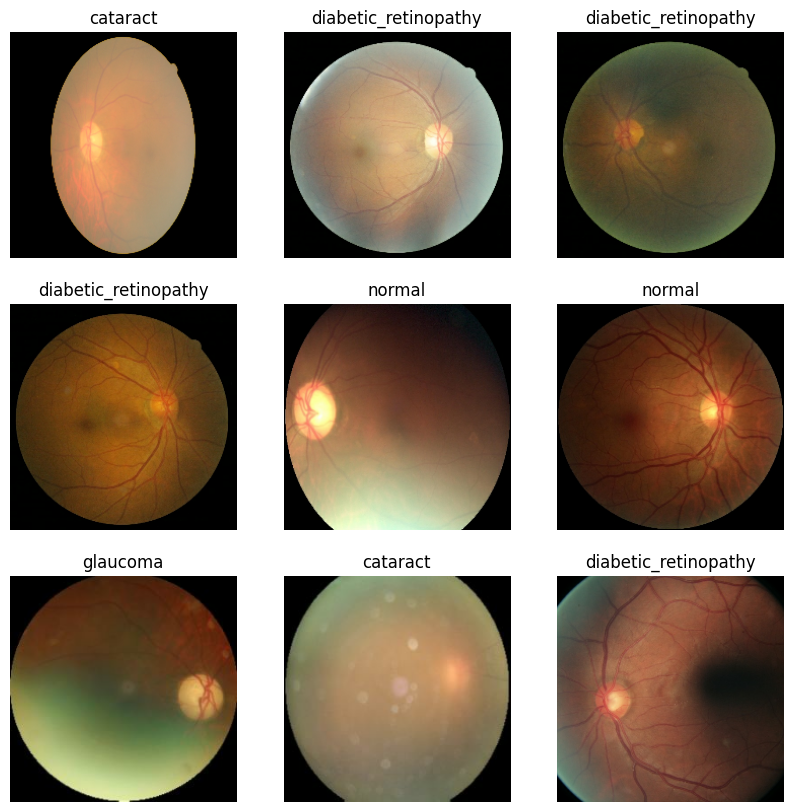

In [16]:
#Show the first nine images and labels from the val set:
plt.figure(figsize=(10, 10))
for images, labels in val.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

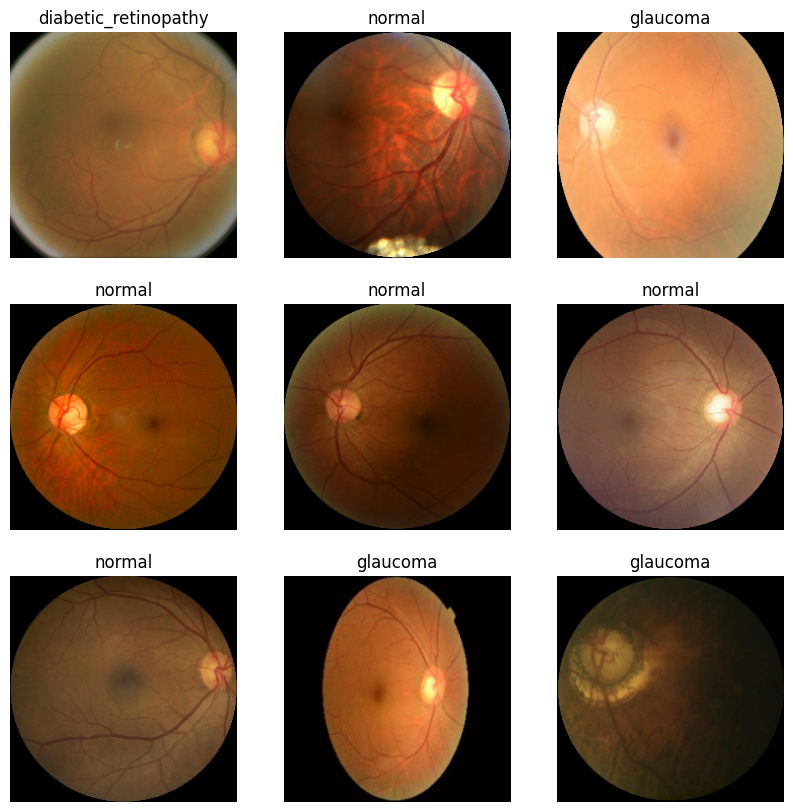

In [17]:
#Show the first nine images and labels from the test set:
plt.figure(figsize=(10, 10))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
#Explore the data
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(64, 224, 224, 3)

In [19]:
ds = train.as_numpy_iterator().next()
print(ds[0].min())
print(ds[0].max())

0.0
255.0


**PRE_PROCESSING**

I removed the scaling/standardization because it makes all the images black, and it results to poor performance.

**Configure the dataset for performance**

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.prefetch(buffer_size=AUTOTUNE)
val = val.prefetch(buffer_size=AUTOTUNE)
test = test.prefetch(buffer_size=AUTOTUNE)

TRY EfficientNet

In [18]:
from keras.applications.efficientnet import EfficientNetB5
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import layers

In [19]:

effnetB5 = EfficientNetB5(include_top=False, weights="imagenet", input_shape=(224,224,3), pooling='max')   # the defined model
print("Number of layers in the base model: ", len(effnetB5.layers))

Number of layers in the base model:  578


In [20]:
def make_model():
    effnet = EfficientNetB5(include_top=False, weights="imagenet",input_shape=(224,224,3), pooling='max') 
    effnet.trainable=False

    
    for layer in effnet.layers[540:]:
      layer.trainable=True
    
    x = effnet.output
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(rate=.5, seed=99)(x)        
    output=layers.Dense(4, activation='softmax')(x)
    
    model= tf.keras.Model(inputs=effnet.input, outputs=output)
    model.compile(optimizer = 'adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
    return model

In [41]:
model = make_model()

In [42]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_10 (Rescaling)       (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_5 (Normalization  (None, 224, 224, 3)  7          ['rescaling_10[0][0]']           
 )                                                                                                
                                                                                            

Training is very slow.

In [24]:
from keras import callbacks 
early_stop = callbacks.EarlyStopping(
        monitor="val_accuracy", 
        patience=7,
        verbose=1,
        mode="max",
        restore_best_weights=True, 
     )



In [44]:
history = model.fit(
    train,
    validation_data=val,
    epochs = 30,
    callbacks=[early_stop]
)

Epoch 1/30
22/22 [==============================] - 186s 8s/step - loss: 0.9609 - accuracy: 0.7306 - val_loss: 6.9339 - val_accuracy: 0.5457
Epoch 2/30
22/22 [==============================] - 160s 7s/step - loss: 0.4385 - accuracy: 0.8588 - val_loss: 3.8662 - val_accuracy: 0.5761
Epoch 3/30
22/22 [==============================] - 160s 7s/step - loss: 0.3032 - accuracy: 0.8993 - val_loss: 2.8153 - val_accuracy: 0.6269
Epoch 4/30
22/22 [==============================] - 253s 12s/step - loss: 0.1895 - accuracy: 0.9312 - val_loss: 2.4178 - val_accuracy: 0.6574
Epoch 5/30
22/22 [==============================] - 159s 7s/step - loss: 0.1682 - accuracy: 0.9399 - val_loss: 1.2565 - val_accuracy: 0.7741
Epoch 6/30
22/22 [==============================] - 165s 8s/step - loss: 0.1374 - accuracy: 0.9544 - val_loss: 0.8570 - val_accuracy: 0.8426
Epoch 7/30
22/22 [==============================] - 165s 8s/step - loss: 0.1257 - accuracy: 0.9558 - val_loss: 0.6792 - val_accuracy: 0.8553
Epoch 8/30
2

In [27]:
# Displaying history loss/accuracy
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_his(history):
    plt.figure(figsize=(15,12))
    metrics = ['accuracy', 'loss']
    for i, metric in enumerate(metrics):
        plt.subplot(220+1+i)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[1], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()
    plt.show()

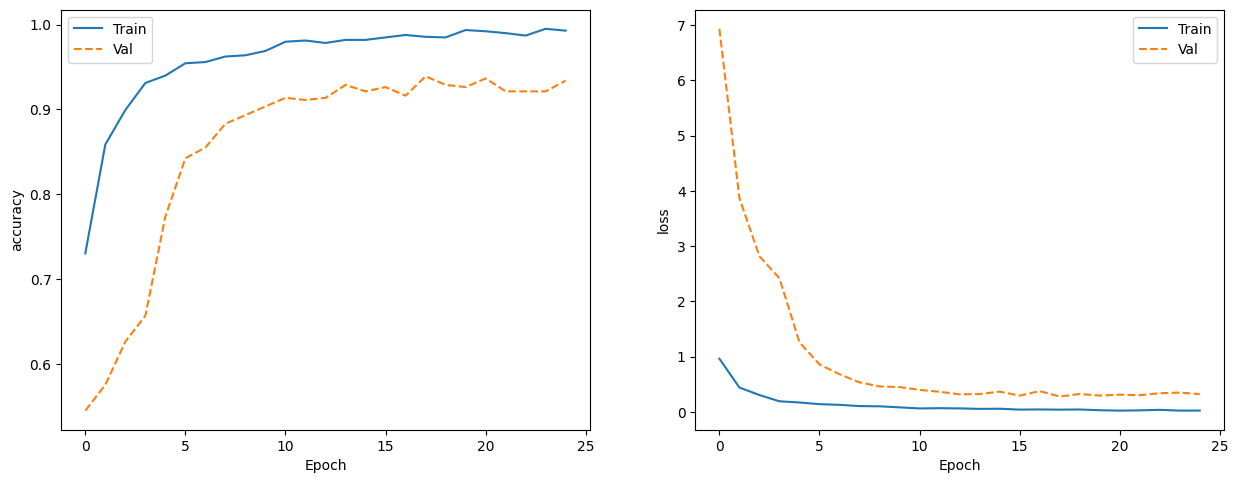

In [52]:
plot_his(history)

In [30]:
test_iter = test.as_numpy_iterator()
test_set = {"images":np.empty((0,224,224,3)), "labels":np.empty(0)}
while True:
  try:
    batch = test_iter.next()
    test_set['images'] = np.concatenate((test_set['images'], batch[0]))
    test_set['labels'] = np.concatenate((test_set['labels'], batch[1]))
  except:
    break
y_true = test_set['labels']


In [55]:
y_pred = np.argmax(model.predict(test_set['images']), 1)

7/7 [==============================] - 18s 2s/step


In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


print(classification_report(y_true, y_pred, target_names = class_names))



                      precision    recall  f1-score   support

            cataract       0.94      0.97      0.95        30
diabetic_retinopathy       0.97      0.97      0.97        30
            glaucoma       0.88      0.70      0.78        30
              normal       0.92      0.96      0.94       109

            accuracy                           0.92       199
           macro avg       0.92      0.90      0.91       199
        weighted avg       0.92      0.92      0.92       199



In [57]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9246231155778895


In [85]:
macro = f1_score(y_true, y_pred, average='macro')
macro


0.9092420381125078

In [86]:
micro = f1_score(y_true, y_pred, average='micro')
micro

0.9246231155778895

Text(0.5, 1.0, 'Confusion Matrix')

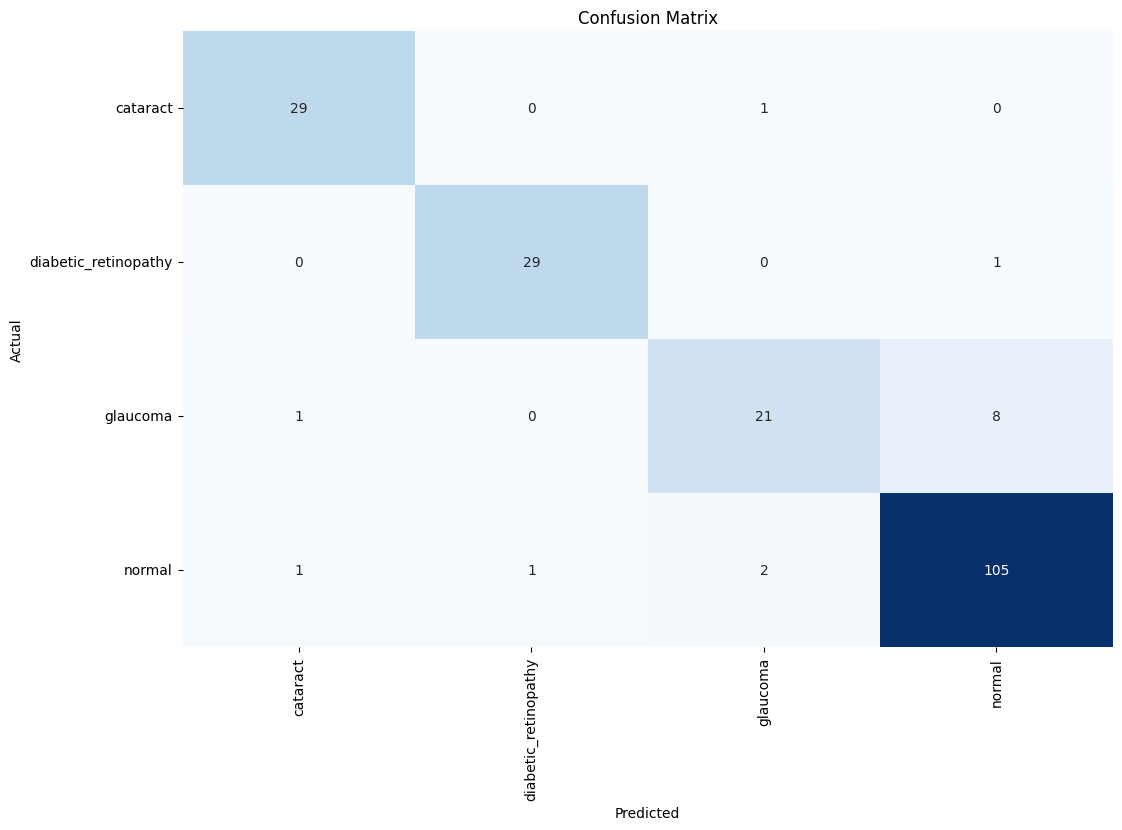

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sea.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(4)+.5, class_names, rotation=90)
plt.yticks(np.arange(4)+.5, class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

Try data augmentation

In [61]:
#Create a new directory where I will put the generated images
orig_dir = 'final_ds'
aug_dir = 'aug_ds'

if not os.path.exists(aug_dir):
    shutil.copytree(orig_dir, aug_dir)
else:
    print(aug_dir, " already exists")

aug_ds  already exists


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
        rotation_range=45,    
        width_shift_range=0.2,   
        height_shift_range=0.2,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=0)    

In [4]:
from skimage import io
import os
from PIL import Image

classes_to_augment_source = ['aug_ds/train/cataract/','aug_ds/train/diabetic_retinopathy/', 'aug_ds/train/glaucoma/']

for num in range(3):
    if len(os.listdir(classes_to_augment_source[num])) == 750:
        print(classes_to_augment_source[num], ' already has ', len(os.listdir(classes_to_augment_source[num])))
    else:
        image_directory = classes_to_augment_source[num]
        SIZE = 224
        dataset = []
        my_images = os.listdir(image_directory)
        for i, image_name in enumerate(my_images):    
            if (image_name.split('.')[1] == 'jpg' or 'jpeg' or 'png'):        
                image = io.imread(image_directory + image_name)        
                image = Image.fromarray(image, 'RGB')        
                image = image.resize((SIZE,SIZE)) 
                dataset.append(np.array(image))
        x = np.array(dataset)
        i = 0
        for batch in datagen.flow(x, batch_size=30,
                                save_to_dir=classes_to_augment_source[num],
                                save_prefix='aug',
                                save_format='png'):
            i+=1
            if i > 17: #Epochs
                break

aug_ds/train/cataract/  already has  750
aug_ds/train/diabetic_retinopathy/  already has  750
aug_ds/train/glaucoma/  already has  750


In [5]:
#Sizes of each class (Augmented + Original)

classes_to_augment_source.append('aug_ds/train/normal/')


cataract_num = len(os.listdir(classes_to_augment_source[0]))
diabetic_num =  len(os.listdir(classes_to_augment_source[1]))
glaucoma_num =  len(os.listdir(classes_to_augment_source[2]))
normal_num =  len(os.listdir(classes_to_augment_source[3]))
total_augOrig = cataract_num + diabetic_num + glaucoma_num + normal_num

print('Size of each classews after Augmentation')
print("Cataract: ", cataract_num)
print("Diabetic retinopathy: ", diabetic_num)
print("Glaucoma: ", glaucoma_num)
print("Normal: ", normal_num)
print('Total: ', total_augOrig)

Size of each classews after Augmentation
Cataract:  750
Diabetic retinopathy:  750
Glaucoma:  750
Normal:  751
Total:  3001


In [12]:
aug_train_directory = 'aug_ds/train/'
batch_size = 64
image_size = (224, 224) #default
IMG_SIZE = 224

print(batch_size, " ", image_size)
aug_train = tf.keras.preprocessing.image_dataset_from_directory(
    aug_train_directory,
    shuffle=True,
    batch_size=batch_size,
    image_size=image_size,
    seed=42
)


val = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    shuffle=True,
    batch_size=batch_size,
    image_size=image_size,
    seed=42
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    shuffle=True,
    batch_size=batch_size,
    image_size=image_size,
    seed=42
)


64   (224, 224)
Found 3001 files belonging to 4 classes.
Found 394 files belonging to 4 classes.
Found 199 files belonging to 4 classes.


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

aug_train = aug_train.prefetch(buffer_size=AUTOTUNE)
val = val.prefetch(buffer_size=AUTOTUNE)
test = test.prefetch(buffer_size=AUTOTUNE)

In [14]:
labels = np.concatenate([y for x,y in aug_train], axis=0)
values = pd.value_counts(labels)
aug_train_values = values.sort_index()
print("Augmented Train Set")
aug_train_values

Augmented Train Set


0    750
1    750
2    750
3    751
Name: count, dtype: int64

To show that the train set is now balanced

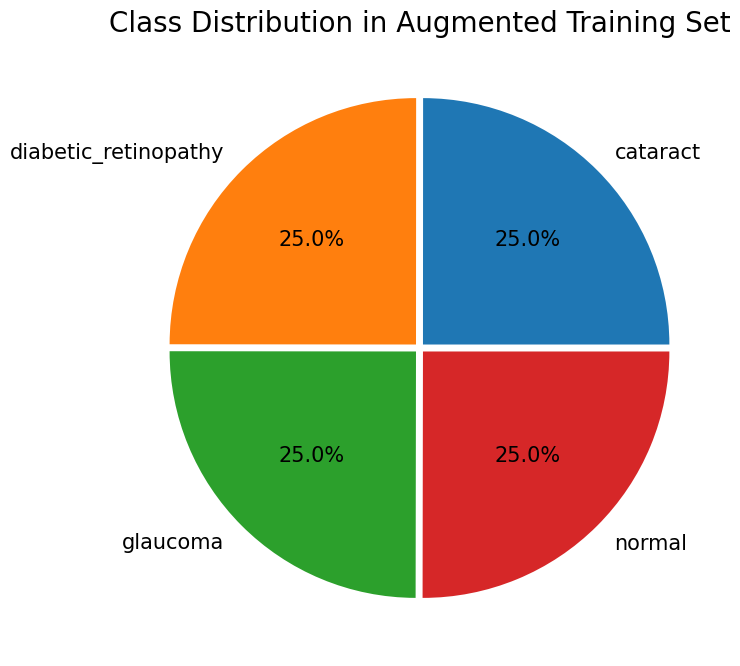

In [15]:
#To show that the dataset is imbalanced
plt.figure(figsize=(12,8))
plt.pie(aug_train_values,labels=class_names,autopct='%1.1f%%', explode = [0.02,0.02,0.02, 0.02], textprops = {"fontsize":15})
plt.title('Class Distribution in Augmented Training Set', fontsize=20)
plt.show()

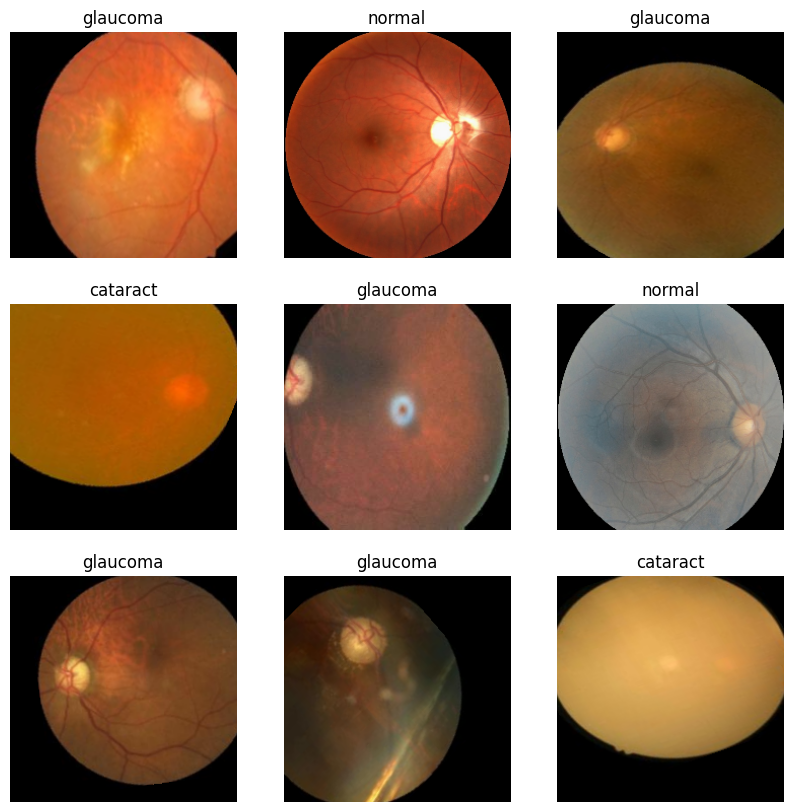

In [16]:
#Show the first nine images and labels from the augmented_training set:
plt.figure(figsize=(10, 10))
for images, labels in aug_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [21]:
model_aug = make_model()

In [22]:
model_aug.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                              

In [25]:
history_aug = model_aug.fit(
    aug_train,
    validation_data=val,
    epochs = 30,
    callbacks=[early_stop]
)

Epoch 1/30


47/47 [==============================] - 318s 7s/step - loss: 0.7766 - accuracy: 0.7804 - val_loss: 0.9313 - val_accuracy: 0.7716
Epoch 2/30
47/47 [==============================] - 339s 7s/step - loss: 0.2746 - accuracy: 0.9070 - val_loss: 0.4090 - val_accuracy: 0.8680
Epoch 3/30
47/47 [==============================] - 461s 10s/step - loss: 0.1649 - accuracy: 0.9444 - val_loss: 0.3447 - val_accuracy: 0.8782
Epoch 4/30
47/47 [==============================] - 336s 7s/step - loss: 0.1432 - accuracy: 0.9444 - val_loss: 0.3784 - val_accuracy: 0.8959
Epoch 5/30
47/47 [==============================] - 480s 10s/step - loss: 0.0963 - accuracy: 0.9693 - val_loss: 0.3474 - val_accuracy: 0.9010
Epoch 6/30
47/47 [==============================] - 306s 6s/step - loss: 0.0927 - accuracy: 0.9653 - val_loss: 0.2720 - val_accuracy: 0.9086
Epoch 7/30
47/47 [==============================] - 303s 6s/step - loss: 0.0692 - accuracy: 0.9740 - val_loss: 0.3350 - val_accuracy: 0.9036
Epoch 8/30
47/47 [====

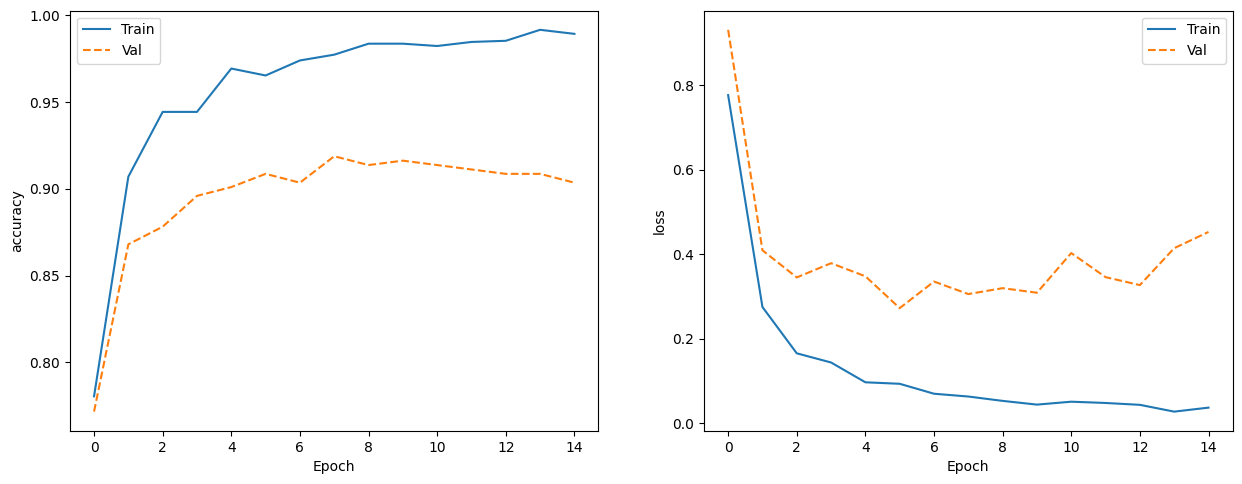

In [28]:
plot_his(history_aug)

In [31]:
y_pred_aug = np.argmax(model_aug.predict(test_set['images']), 1)

7/7 [==============================] - 18s 2s/step


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print(classification_report(y_true, y_pred_aug, target_names = class_names))

                      precision    recall  f1-score   support

            cataract       0.94      0.97      0.95        30
diabetic_retinopathy       0.94      1.00      0.97        30
            glaucoma       0.77      0.77      0.77        30
              normal       0.94      0.92      0.93       109

            accuracy                           0.91       199
           macro avg       0.90      0.91      0.90       199
        weighted avg       0.91      0.91      0.91       199



In [34]:
accuracy_aug = accuracy_score(y_true, y_pred_aug)
print("Accuracy:", accuracy_aug)

Accuracy: 0.914572864321608


In [35]:
aug_macro = f1_score(y_true, y_pred_aug, average='macro')
aug_macro

0.903865208105305

In [36]:
aug_micro = f1_score(y_true, y_pred_aug, average='micro')
aug_micro

0.914572864321608

Text(0.5, 1.0, 'Confusion Matrix')

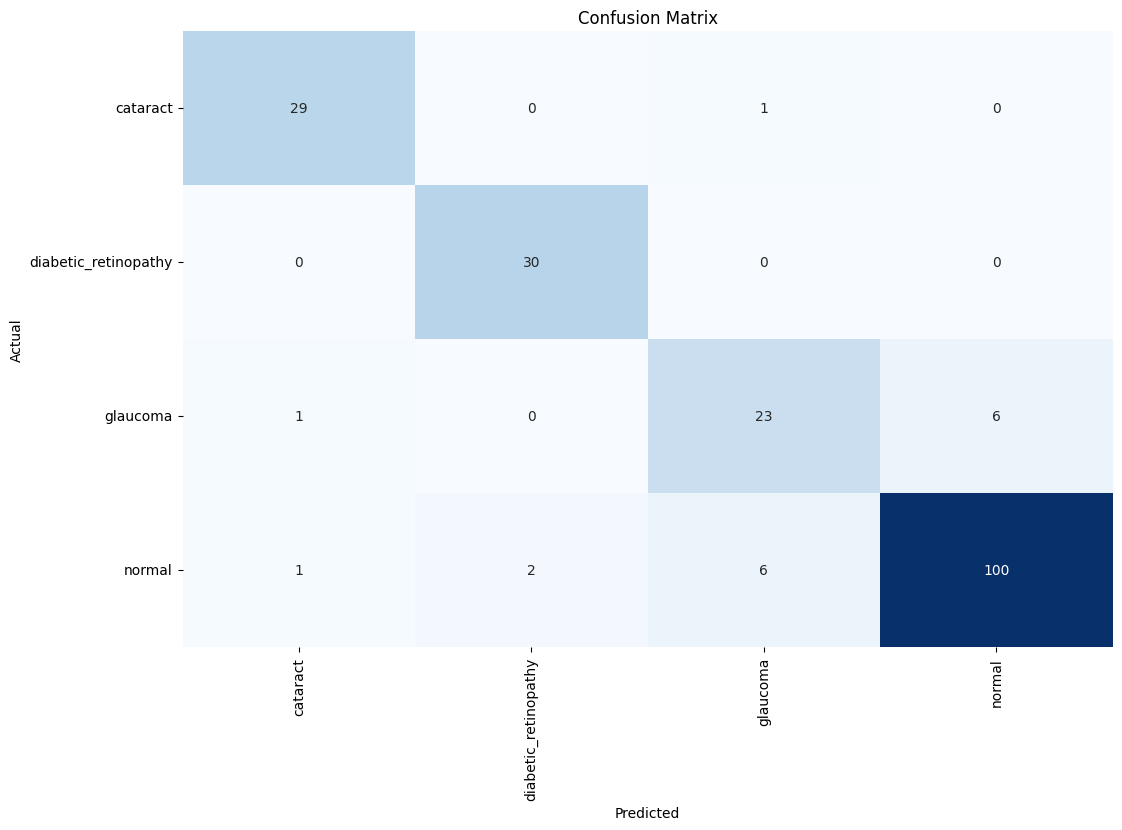

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_aug)
plt.figure(figsize=(12, 8))
sea.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(4)+.5, class_names, rotation=90)
plt.yticks(np.arange(4)+.5, class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [38]:
#I need to manually store these values so that 
#I dont have to run again the training in the imbalanced dataset
accuracy = 0.924623
macro = 0.909242	
micro = 0.924623


In [39]:
# Define table headers and data
headers = ["Dataset Type", "Accuracy", "F1 Score (Macro)", "F1 Score (Micro)"]
data = [
    ["Imbalanced", accuracy, macro, micro],
    ["Augmented", accuracy_aug, aug_macro, aug_micro]
]


df = pd.DataFrame(data, columns=headers)


def make_pretty(styler):
    styler.set_caption("Training on Imbalanced vs Augmented dataset")
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

df.style.pipe(make_pretty)